<a href="https://colab.research.google.com/github/d33pd/d33pd/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

vxn = pd.read_csv('/content/drive/MyDrive/vxn.csv')
lvxn = pd.read_csv('/content/drive/MyDrive/training_set_labels.csv')
tvxn = pd.read_csv('/content/drive/MyDrive/tvxn.csv')
print(vxn.head())

   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             1.0                        0.0   
2              1           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           1.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0               

In [ ]:


null_values = tvxn.isnull().sum()

print(null_values)


respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [ ]:


null_values = vxn.isnull().sum()

print(null_values)


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:


correlation_matrix = vxn.iloc[:, 1:3].corr()
print(correlation_matrix)


                h1n1_concern  h1n1_knowledge
h1n1_concern        1.000000        0.008819
h1n1_knowledge      0.008819        1.000000


In [ ]:

correlation = vxn['health_insurance'].corr(vxn['rent_or_own'])
print(correlation)


0.20544957259329913


In [ ]:
correlation = vxn['health_insurance'].corr(vxn['income_poverty'])
print(correlation)

0.2575748585593287


In [ ]:
correlation = vxn['rent_or_own'].corr(vxn['income_poverty'])
print(correlation)

0.32564758410308603


In [ ]:
correlation = vxn['marital_status'].corr(vxn['income_poverty'])
print(correlation)

-0.32975796482238817


In [ ]:
correlation = vxn['race'].corr(vxn['income_poverty'])
print(correlation)

0.030714901604380174


In [ ]:
correlation = vxn['education'].corr(vxn['income_poverty'])
print(correlation)

0.42157543336376035


In [ ]:
correlation_matrix = vxn.iloc[:, 3:5].corr()
print(correlation_matrix)

                           behavioral_antiviral_meds  behavioral_avoidance
behavioral_antiviral_meds                   1.000000              0.049247
behavioral_avoidance                        0.049247              1.000000


In [ ]:
correlation_matrix = vxn.iloc[:, 10:12].corr()
print(correlation_matrix)

                      doctor_recc_h1n1  doctor_recc_seasonal
doctor_recc_h1n1              1.000000              0.591868
doctor_recc_seasonal          0.591868              1.000000


In [ ]:
correlation_matrix = vxn.iloc[:, 16:18].corr()
print(correlation_matrix)

                             opinion_h1n1_vacc_effective  opinion_h1n1_risk
opinion_h1n1_vacc_effective                     1.000000           0.209965
opinion_h1n1_risk                               0.209965           1.000000


In [ ]:

null_values = vxn.isnull().sum()

for column, null_count in null_values.items():
  if null_count > 0:
    print(f"{column}: {null_count}")


h1n1_concern: 92
h1n1_knowledge: 116
behavioral_antiviral_meds: 71
behavioral_avoidance: 208
behavioral_face_mask: 19
behavioral_wash_hands: 42
behavioral_large_gatherings: 87
behavioral_outside_home: 82
behavioral_touch_face: 128
doctor_recc_h1n1: 2160
doctor_recc_seasonal: 2160
chronic_med_condition: 971
child_under_6_months: 820
health_worker: 804
health_insurance: 12274
opinion_h1n1_vacc_effective: 391
opinion_h1n1_risk: 388
opinion_h1n1_sick_from_vacc: 395
opinion_seas_vacc_effective: 462
opinion_seas_risk: 514
opinion_seas_sick_from_vacc: 537
education: 1407
income_poverty: 4423
marital_status: 1408
rent_or_own: 2042
employment_status: 1463
household_adults: 249
household_children: 249
employment_industry: 13330
employment_occupation: 13470


In [ ]:


unique_values = vxn.iloc[:, 1].unique()

print(unique_values)


[ 1.  3.  0. nan]


In [ ]:
for column in vxn.iloc[:, 3:10]:
  mode_value = vxn[column].mode()[0]
  vxn[column].fillna(value=mode_value, inplace=True)


In [ ]:
for column in tvxn.iloc[:, 3:10]:
  mode_value = tvxn[column].mode()[0]
  tvxn[column].fillna(value=mode_value, inplace=True)

null_values = tvxn.isnull().sum()
print(null_values)


respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [ ]:
for column in vxn.iloc[:, 3:10]:
  mode_value = vxn[column].mode()[0]
  vxn[column].fillna(value=mode_value, inplace=True)

null_values = vxn.isnull().sum()
print(null_values)


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
for column in tvxn.iloc[:, 16:22]:
  mode_value = tvxn[column].mode()[0]
  tvxn[column].fillna(value=mode_value, inplace=True)

null_values = tvxn.isnull().sum()
print(null_values)


respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [ ]:
for column in vxn.iloc[:, 16:22]:
  mode_value = vxn[column].mode()[0]
  vxn[column].fillna(value=mode_value, inplace=True)

null_values = vxn.isnull().sum()
print(null_values)

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:

vxn.isnull().sum()



respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:

null_values = tvxn.isnull().sum()

for column, null_count in null_values.items():
  if null_count > 0:
    print(f"{column}: {null_count}")


h1n1_concern: 85
h1n1_knowledge: 122
doctor_recc_h1n1: 2160
doctor_recc_seasonal: 2160
chronic_med_condition: 932
child_under_6_months: 813
health_worker: 789
health_insurance: 12228
education: 1407
income_poverty: 4497
marital_status: 1442
0_or_1: 2036
employment_status: 1471
household_adults: 225
household_children: 225
employment_industry: 13275
employment_occupation: 13426


In [ ]:
tvxn.drop(['employment_industry', 'employment_occupation'], axis=1, inplace=True)
print(tvxn)

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              26707           2.0             2.0                        0.0   
1              26708           1.0             1.0                        0.0   
2              26709           2.0             2.0                        0.0   
3              26710           1.0             1.0                        0.0   
4              26711           3.0             1.0                        1.0   
...              ...           ...             ...                        ...   
26703          53410           1.0             1.0                        0.0   
26704          53411           3.0             1.0                        0.0   
26705          53412           0.0             1.0                        0.0   
26706          53413           3.0             1.0                        0.0   
26707          53414           2.0             1.0                        0.0   

       behavioral_avoidance

In [ ]:
vxn.drop(['employment_industry', 'employment_occupation'], axis=1, inplace=True)
print(vxn)

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             1.0                        0.0   
2                  1           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           1.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          16701           1.0             0.0                        0.0   
26703          16703           1.0             1.0                        0.0   
26704          16704           1.0             1.0                        0.0   
26705          16705           1.0             1.0                        0.0   
26706          16706           0.0             0.0                        0.0   

       behavioral_avoidance

In [ ]:
correlation = vxn['health_worker'].corr(vxn['child_under_6_months'])
print(correlation)


0.07907821280898011


In [ ]:
correlation = vxn['household_adults'].corr(vxn['household_children'])
print(correlation)


0.1816598272608837


In [ ]:
missing_values_count = vxn.isnull().sum()
for feature, count in missing_values_count.items():
    if count > 0:
        print(f"'{feature}' : {count} ")

'h1n1_concern' : 92 
'h1n1_knowledge' : 116 
'doctor_recc_h1n1' : 2160 
'doctor_recc_seasonal' : 2160 
'chronic_med_condition' : 971 
'child_under_6_months' : 820 
'health_worker' : 804 
'health_insurance' : 12274 
'education' : 1407 
'income_poverty' : 4423 
'marital_status' : 1408 
'rent_or_own' : 2042 
'employment_status' : 1463 
'household_adults' : 249 
'household_children' : 249 


In [ ]:
missing_values_count = tvxn.isnull().sum(axis=1)

max_missing_index = missing_values_count.idxmax()

print(f"Row {max_missing_index} = {missing_values_count[max_missing_index]}")

Row 15368 = 14


In [ ]:
tvxn.drop(index= 15368, inplace=True)

In [ ]:
missing_values_count = vxn.isnull().sum(axis=1)

max_missing_index = missing_values_count.idxmax()

print(f"Row {max_missing_index} = {missing_values_count[max_missing_index]}")

Row 12629 = 14


In [ ]:
vxn.drop(index=  12629, inplace=True)

In [ ]:
tvxn.shape

(26707, 34)

In [ ]:
vxn.shape

(26706, 34)

In [ ]:
missing_values_count = vxn.isnull().sum(axis=1)

max_missing_index = missing_values_count.idxmax()

print(f"Row {max_missing_index} = {missing_values_count[max_missing_index]}")

Row 1139 = 13


In [ ]:
row_nan_count = tvxn.isna().sum(axis=1)

rows_with_13_missing = row_nan_count[row_nan_count == 13].index.tolist()

print(rows_with_13_missing)

tvxn.drop(index= rows_with_13_missing , inplace=True)

[1556, 2417, 2991, 3543, 5432, 6791, 6942, 7550, 7810, 8240, 8334, 8607, 9590, 9803, 10248, 10627, 11342, 11466, 13760, 14524, 14592, 14835, 16200, 16375, 16688, 16965, 17242, 17266, 17424, 18087, 18486, 18669, 18772, 18935, 19921, 20329, 20480, 20931, 22001, 22461, 22931, 23850, 24278, 24322, 24794, 25656]


In [ ]:
tvxn.shape

(26661, 34)

In [ ]:
row_nan_count = vxn.isna().sum(axis=1)

rows_with_13_missing = row_nan_count[row_nan_count == 13].index.tolist()

print(rows_with_13_missing)

vxn.drop(index= rows_with_13_missing , inplace=True)

[1139, 1156, 1646, 3694, 3772, 4076, 4328, 4912, 5163, 6040, 6105, 6230, 7102, 7749, 7878, 8026, 10133, 10179, 10742, 11487, 11684, 11714, 11795, 12677, 14241, 14266, 14518, 14910, 15277, 15356, 15425, 15580, 15591, 15788, 16184, 16723, 17565, 17597, 17815, 18268, 18755, 19463, 19565, 19986, 20351, 20432, 20553, 20587, 20623, 21145, 21964, 22281, 22607, 24234, 25399]


In [ ]:
row_nan_count = vxn.isna().sum(axis=1)

rows_with_12_missing = row_nan_count[row_nan_count == 12].index.tolist()

print(rows_with_12_missing)

vxn.drop(index= rows_with_12_missing , inplace=True)

[1672, 3483, 6279, 10426, 23118, 24967, 25979]


In [ ]:
row_nan_count = tvxn.isna().sum(axis=1)

rows_with_12_missing = row_nan_count[row_nan_count == 12].index.tolist()

print(rows_with_12_missing)

tvxn.drop(index= rows_with_12_missing , inplace=True)

[498, 3586, 5723, 8759, 10081, 21939]


In [ ]:
row_nan_count = tvxn.isna().sum(axis=1)

rows_with_11_missing = row_nan_count[row_nan_count ==11].index.tolist()

print(rows_with_11_missing)

tvxn.drop(index= rows_with_11_missing , inplace=True)

[53, 177, 221, 240, 249, 260, 297, 308, 344, 401, 407, 500, 502, 579, 610, 733, 779, 801, 927, 1072, 1207, 1356, 1430, 1490, 1530, 1670, 1675, 1719, 1865, 2163, 2235, 2407, 2459, 2654, 2656, 2670, 2971, 3069, 3079, 3237, 3248, 3268, 3405, 3569, 3804, 4019, 4212, 4271, 4467, 4581, 4608, 4634, 4646, 4679, 4785, 4877, 4983, 5053, 5220, 5302, 5336, 5436, 5555, 5565, 5592, 5600, 5628, 5659, 5669, 5704, 5825, 5852, 5897, 6529, 6634, 6920, 7040, 7271, 7277, 7534, 7643, 7832, 7853, 8011, 8255, 8416, 8419, 8512, 8561, 8668, 8704, 8766, 9110, 9233, 9264, 9270, 9297, 9435, 9513, 9573, 9701, 9864, 9896, 9972, 10191, 10307, 10370, 10475, 10705, 10741, 10881, 10975, 10996, 11040, 11050, 11064, 11221, 11300, 11373, 11521, 11543, 11629, 11678, 11754, 11841, 11947, 11984, 12182, 12228, 12292, 12516, 13253, 13349, 13610, 13650, 13902, 13923, 14108, 14391, 14440, 14506, 14942, 15017, 15056, 15124, 15132, 15188, 15220, 15337, 15362, 15374, 15398, 15426, 15864, 15987, 16032, 16182, 16367, 16388, 16535, 165

In [ ]:
row_nan_count = vxn.isna().sum(axis=1)

rows_with_11_missing = row_nan_count[row_nan_count == 11].index.tolist()

print(len(rows_with_11_missing))
vxn.drop(index= rows_with_11_missing , inplace=True)

257


In [ ]:
row_nan_count = tvxn.isna().sum(axis=1)

rows_with_10_missing = row_nan_count[row_nan_count == 10].index.tolist()

print(rows_with_10_missing)

tvxn.drop(index= rows_with_10_missing , inplace=True)

[259, 611, 1112, 1756, 2690, 3399, 3548, 3775, 4329, 6020, 6608, 6849, 7028, 7990, 9358, 10237, 11150, 11303, 12231, 12814, 13546, 13658, 13806, 13824, 14606, 17153, 18047, 19550, 19554, 22605, 23371, 23703, 25815, 26647]


In [ ]:
row_nan_count = vxn.isna().sum(axis=1)

rows_with_10_missing = row_nan_count[row_nan_count == 10].index.tolist()

print(rows_with_10_missing)

vxn.drop(index= rows_with_10_missing , inplace=True)

[683, 1318, 1706, 1988, 2116, 2598, 4365, 4592, 4674, 4737, 6417, 6454, 6887, 7587, 7642, 8663, 9681, 13140, 13202, 13748, 13994, 15439, 15468, 17384, 17791, 18081, 18102, 19621, 25039, 26298]


In [ ]:
row_nan_count = tvxn.isna().sum(axis=1)

rows_with_9_missing = row_nan_count[row_nan_count == 9].index.tolist()

print(rows_with_9_missing)

tvxn.drop(index= rows_with_9_missing , inplace=True)

[39, 69, 78, 92, 134, 169, 243, 255, 340, 462, 508, 573, 574, 657, 693, 704, 727, 746, 752, 772, 891, 966, 1009, 1089, 1155, 1203, 1227, 1374, 1495, 1659, 1741, 1821, 1901, 1905, 1913, 2104, 2107, 2326, 2327, 2392, 2480, 2499, 2543, 2565, 2634, 2699, 2733, 2848, 2923, 2969, 2983, 3084, 3218, 3254, 3270, 3302, 3376, 3427, 3687, 3739, 3742, 3759, 3797, 3893, 3930, 3983, 4045, 4198, 4412, 4460, 4500, 4506, 4520, 4536, 4588, 4593, 4598, 4609, 4627, 4689, 4816, 4860, 4873, 5055, 5100, 5210, 5230, 5275, 5333, 5361, 5457, 5536, 5543, 5596, 5769, 5798, 5906, 5955, 6118, 6229, 6234, 6270, 6302, 6304, 6334, 6412, 6463, 6496, 6595, 6624, 6728, 6734, 6768, 6813, 6852, 7064, 7097, 7213, 7318, 7372, 7384, 7409, 7570, 7612, 7733, 7788, 7805, 7864, 7896, 7948, 8037, 8076, 8127, 8179, 8199, 8243, 8301, 8342, 8410, 8420, 8423, 8525, 8709, 8889, 8925, 9132, 9137, 9169, 9345, 9381, 9397, 9408, 9572, 9704, 9766, 10116, 10196, 10262, 10330, 10554, 10682, 10684, 10993, 11160, 11173, 11182, 11220, 11222, 1129

In [ ]:
row_nan_count = vxn.isna().sum(axis=1)

rows_with_9_missing = row_nan_count[row_nan_count == 9].index.tolist()

print(rows_with_9_missing)

vxn.drop(index= rows_with_9_missing , inplace=True)

[64, 175, 203, 269, 328, 379, 410, 570, 645, 711, 794, 900, 935, 977, 1116, 1120, 1147, 1187, 1233, 1273, 1442, 1573, 1621, 1636, 1701, 1719, 1739, 1796, 1949, 2080, 2093, 2095, 2206, 2270, 2477, 2504, 2604, 2681, 2687, 2742, 2964, 2999, 3264, 3369, 3375, 3422, 3526, 3540, 3602, 3688, 3706, 3779, 3785, 3867, 3933, 3971, 4098, 4236, 4286, 4299, 4319, 4326, 4410, 4429, 4442, 4546, 4765, 4887, 4902, 4925, 4934, 5021, 5114, 5246, 5268, 5358, 5430, 5533, 5712, 5752, 5907, 5918, 5976, 5977, 5980, 5984, 6001, 6005, 6084, 6092, 6143, 6183, 6204, 6328, 6355, 6564, 6603, 6614, 6728, 6744, 6815, 6827, 6927, 6983, 7021, 7068, 7085, 7096, 7205, 7221, 7237, 7413, 7456, 7664, 7704, 7722, 7893, 7934, 7964, 8126, 8148, 8357, 8376, 8481, 8497, 8618, 8645, 8693, 8804, 8828, 8875, 9032, 9149, 9156, 9158, 9215, 9246, 9259, 9276, 9436, 9482, 9495, 9503, 9680, 9743, 9783, 9886, 9922, 9968, 9988, 10033, 10303, 10310, 10327, 10345, 10355, 10449, 10476, 10481, 10511, 10741, 10822, 10907, 11013, 11124, 11126, 11

In [ ]:
print(vxn.shape,tvxn.shape)

(25945, 34) (25973, 34)


In [ ]:
missing_values_count = tvxn.isnull().sum()
for feature, count in missing_values_count.items():
    if count > 0:
        print(f"'{feature}' : {count} ")

'h1n1_concern' : 75 
'h1n1_knowledge' : 113 
'doctor_recc_h1n1' : 1975 
'doctor_recc_seasonal' : 1975 
'chronic_med_condition' : 233 
'child_under_6_months' : 81 
'health_worker' : 69 
'health_insurance' : 11493 
'education' : 672 
'income_poverty' : 3762 
'marital_status' : 707 
'0_or_1' : 1301 
'employment_status' : 736 
'household_adults' : 21 
'household_children' : 21 


In [ ]:
missing_values_count = vxn.isnull().sum()
for feature, count in missing_values_count.items():
    if count > 0:
        print(f"'{feature}' : {count} ")

'h1n1_concern' : 82 
'h1n1_knowledge' : 109 
'doctor_recc_h1n1' : 1972 
'doctor_recc_seasonal' : 1972 
'chronic_med_condition' : 246 
'child_under_6_months' : 59 
'health_worker' : 56 
'health_insurance' : 11513 
'education' : 645 
'income_poverty' : 3661 
'marital_status' : 646 
'rent_or_own' : 1280 
'employment_status' : 701 
'household_adults' : 24 
'household_children' : 24 


In [ ]:
from re import T
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
tdf= tvxn
for column in tdf.select_dtypes(include=['object']).columns:
    mode_value = tdf[column].mode()[0]
    tdf[column].fillna(mode_value, inplace=True)

imputer = IterativeImputer(max_iter=100, tol=1e-3, random_state=0)
tdf_imputed = imputer.fit_transform(tdf)
tdf_imputed = pd.DataFrame(tdf_imputed, columns=tdf.columns)


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df= vxn
for column in df.select_dtypes(include=['object']).columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

imputer = IterativeImputer(max_iter=100, tol=1e-3, random_state=0)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)


In [ ]:
missing_values_count = df_imputed.isnull().sum()
for feature, count in missing_values_count.items():
    if count > 0:
        print(f"'{feature}' : {count} ")

In [ ]:
tdf_imputed.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
0_or_1                         0
employment_status              0
hhs_geo_re

In [ ]:
df_imputed.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_imputed.corr(), cmap='coolhot')
plt.show()


KeyError: "'coolhot' is not a known colormap name"

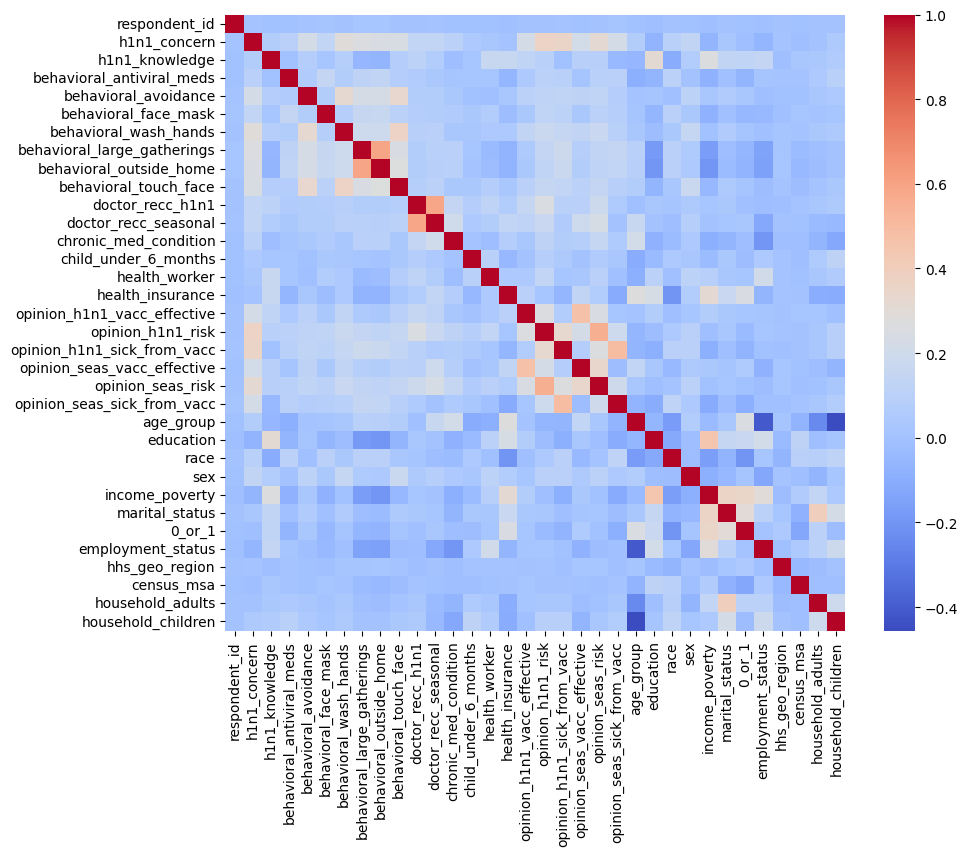

In [ ]:
sns.heatmap(tdf_imputed.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr = df_imputed.corr()
threshold = 0.5  # set your threshold here
corr_mask = np.abs(corr) > threshold
corr[corr_mask] = 0.0
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='cubehelix', annot_kws={'rotation': 90})
plt.show()

In [ ]:
mask = lvxn.index.isin(df_imputed.index)

ldf = lvxn[mask]

In [ ]:

from scipy.stats import chi2_contingency
import pandas as pd

crosstab = pd.crosstab(df_imputed['rent_or_own'], df_imputed['income_poverty'])

chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


In [ ]:
'''from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

X = df_imputed
y = ldf

knn.fit(X, y)

y_pred = knn.predict(tdf_imputed)
y_predict = pd.DataFrame(y_pred)
y_predict


In [ ]:
'''from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(df_imputed,ldf)

In [ ]:

'''predictions = model.predict(tdf_imputed)

In [ ]:
'''print(model.score(df_imputed,lvxn))